# Key Code Blocks for EDA
[source](https://towardsdatascience.com/13-key-code-blocks-for-eda-classification-task-94890622be57)


EDA or Exploratory Data Analysis is an important machine learning step that involves learning about the data without spending too much time or getting lost in it. Here, you get familiar with the structure and general characteristics of the dataset, and the independent and dependent features, and their interactions. You will also get an idea of the data cleaning processes to employ, and the possible modeling techniques.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('./hr-data/aug_train.csv', index_col='enrollee_id')

## 1. Shape (dimension of the DataFrame)

- number of rows => number of samples
- number of columns => number of input features and target values

In [3]:
data.shape

(19158, 13)

## 2. Data types of the various columns
This helps us understand the kind of data we are dealing with, in terms of the numerical and categorical distributions. This will also shed light on some of the exploratory plots and graphs to use.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19158 entries, 8949 to 23834
Data columns (total 13 columns):
city                      19158 non-null object
city_development_index    19158 non-null float64
gender                    14650 non-null object
relevent_experience       19158 non-null object
enrolled_university       18772 non-null object
education_level           18698 non-null object
major_discipline          16345 non-null object
experience                19093 non-null object
company_size              13220 non-null object
company_type              13018 non-null object
last_new_job              18735 non-null object
training_hours            19158 non-null int64
target                    19158 non-null float64
dtypes: float64(2), int64(1), object(10)
memory usage: 2.0+ MB


## 3. Display a few rows
What to look out for:
- Do the column names make sense? You can check the column definitions again.
- What values are in the columns? Do they make sense?
- Can you see a significant number of missing values (NaNs)
- What are some of the unique classes for the categorical features?

In [5]:
data.head(5)
# data.tail(5)
# data.sample(5)

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
enrollee_id,,,,,,,,,,,,,
8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


## Numeric Distributions
We will use **graphs** to plot the distributions and get an intuitive idea of the values in each column. We will also display actual summary statistics that contain actual numbers of the distributions.

## 4. Plot a histogram grid of the numeric features
A histogram is a form of a bar chart that groups numbers into ranges and the height of the bars show how many values fall into that range. 

What to look out for:
- Potential outliers
- Numeric features that should be categorical (indicator) features. For example, if there are only two possible values like 0 and 1.
- Boundaries that do not make sense, such as a percentage value greater than 100.

/home/nbhung/anaconda3/envs/data/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/nbhung/anaconda3/envs/data/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/nbhung/anaconda3/envs/data/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/home/nbhun

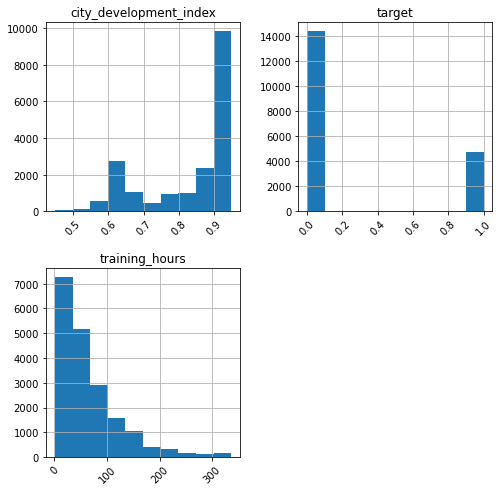

In [6]:
data.hist(figsize=(8,8), xrot=45);

- `target` => binary classification, imbalanced dataset
- `training hours`: most less than 50 hours

## 5. Display the numeric features’ summary statistics
What to look out for:
- The `count`, or the number of non-NaN values in the column. If the count is less than the overall rows in the data frame, that column contains missing (NaN) values.
- The average value, or `mean`.
- The `std`, or standard deviation of the values in the column
- The minimum value or `min`
- The 25th percentile value or `25%`
- The median, or 50th percentile or `50%`
- The 75th percentile - `75%`
- The maximum value. This could also indicate extreme (outlier) values. - `max`

In [7]:
data.describe()

,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000
mean,0.828848,65.366896,0.249348
std,0.123362,60.058462,0.432647
min,0.448000,1.000000,0.000000
25%,0.740000,23.000000,0.000000
50%,0.903000,47.000000,0.000000
75%,0.920000,88.000000,0.000000
max,0.949000,336.000000,1.000000


## Distribution of Categorical features
We will use both graphs and summary statistics to view the distributions of the different classes in each column.
## 6. Summary statistics of the Categorical features
What to look out for:
- The `count`, or number of non-NaN values. Missing values are present if the count is less than the total rows of the DataFrame.
- The number of `unique` classes.
- The `top` most common value or class. If multiple values have the highest occurrence, an arbitrary top (and freq) value will be displayed.
- The frequency (`freq`), or the number of occurrences of the top class.

In [8]:
data.describe(include='object').T

,count,unique,top,freq
city,19158,123,city_103,4355
gender,14650,3,Male,13221
relevent_experience,19158,2,Has relevent experience,13792
enrolled_university,18772,3,no_enrollment,13817
education_level,18698,5,Graduate,11598
major_discipline,16345,6,STEM,14492
experience,19093,22,>20,3286
company_size,13220,8,50-99,3083
company_type,13018,6,Pvt Ltd,9817
last_new_job,18735,6,1,8040


## 7. Plot categorical distributions
What to look out for:
- Sparse classes — those with very few values. These can affect a model’s performance.
- Inconsistent names or typos eg labeling 2 similar classes differently.

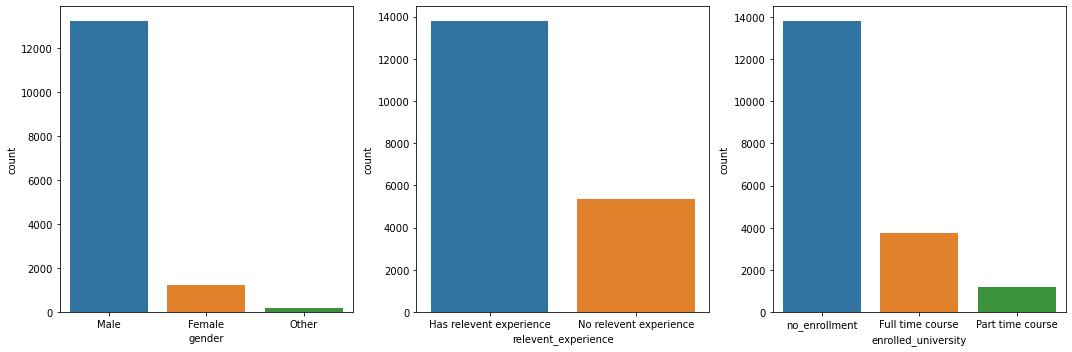

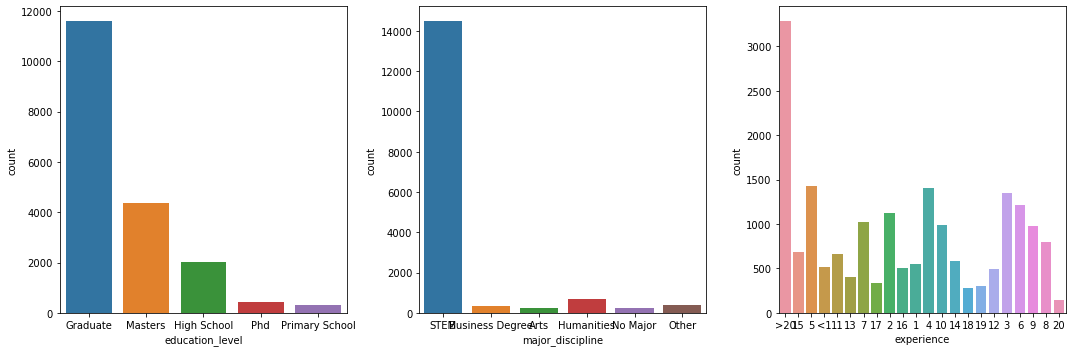

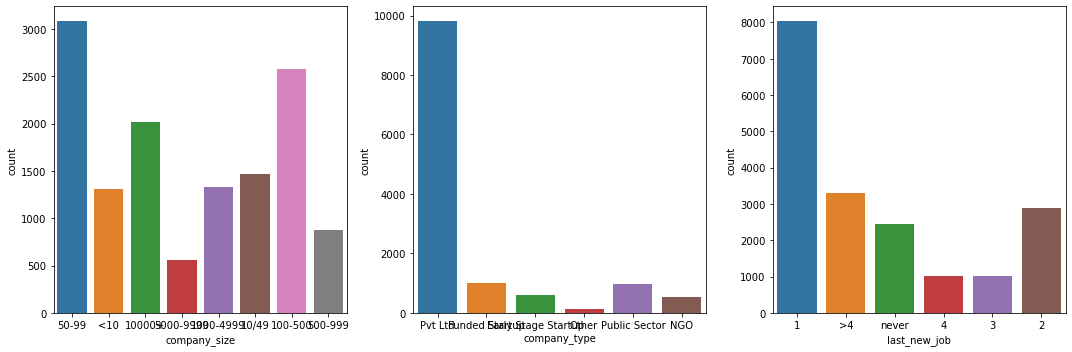

In [9]:
i = 0
for col in data.select_dtypes(include='object'):
    if data[col].nunique() <= 22:
        if i % 3 == 0:
            _, ax = plt.subplots(1, 3, figsize=(15, 5))
        sns.countplot(x=col, data=data, ax=ax[i % 3])
        plt.tight_layout()
#         plt.show()
        i += 1    

## Segment and group by the target feature
We can segment our data into groups and observe the relationships between categorical and numeric features, particularly concerning the target.

## 8. Segment the target by numeric features
Here, we will separate the data by the target feature and observe how the numeric features are distributed among those who left (target = 1) and those who stayed (target = 0).

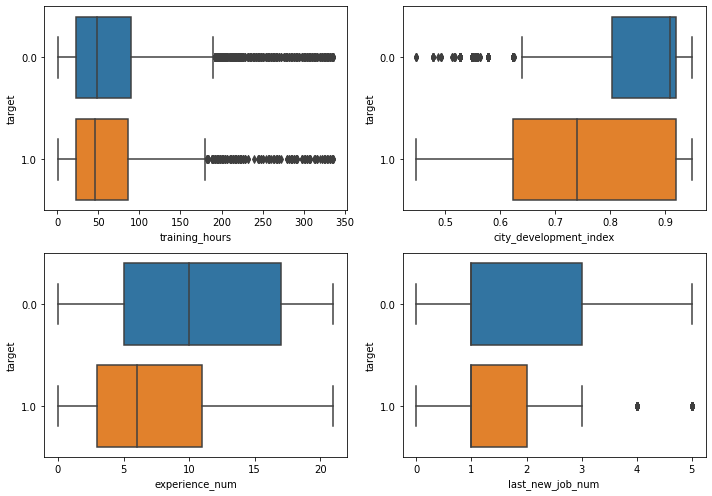

In [10]:
data['experience_num'] = data['experience'].replace({'>20':'21', '<1': '0'}).astype(float)
data['last_new_job_num'] = data['last_new_job'].replace({'>4':'5','never':'0'}).astype(float)

num_cols = ['training_hours','city_development_index', 'experience_num', 'last_new_job_num']
fig, ax = plt.subplots(2, 2, figsize=(10, 7))
for i in range(len(num_cols)):
    col = num_cols[i]
    sns.boxplot(y=data['target'].astype('category'), x=col, data=data, ax=ax[i//2][i%2])
plt.tight_layout()

We can see that `training_hours` are equally distributed among those who stayed(target 0) and those who left (target 1). This means that `training_hours` might not be a good predictor for the target. However, we see that when it comes to `experience` and `last_new_job`, a bigger proportion of those who stayed are tending towards higher years of experience and these could be good predictors.

## Segment Categorical features by the target classes
## 9. Tabulate target across various categorical features using cross tab


In [11]:
pd.crosstab(data['target'], data['gender'])

gender,Female,Male,Other
target,,,
0.0,912,10209,141
1.0,326,3012,50


In [12]:
for col in data.select_dtypes(include='object'):
    if data[col].nunique() <=4:
        display(pd.crosstab(data['target'], data[col], normalize='index'))

gender,Female,Male,Other
target,,,
0.0,0.080980,0.90650,0.012520
1.0,0.096222,0.88902,0.014758


relevent_experience,Has relevent experience,No relevent experience
target,,
0.0,0.753147,0.246853
1.0,0.619845,0.380155


enrolled_university,Full time course,Part time course,no_enrollment
target,,,
0.0,0.164754,0.063465,0.771781
1.0,0.307477,0.064890,0.627632


These tables show how the categorical features’ classes are split among the target’s classes.

## 10. Count plot of target across various categorical features
What to look out for:
- Categorical features that change significantly with the target classes

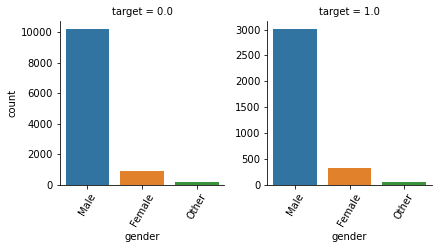

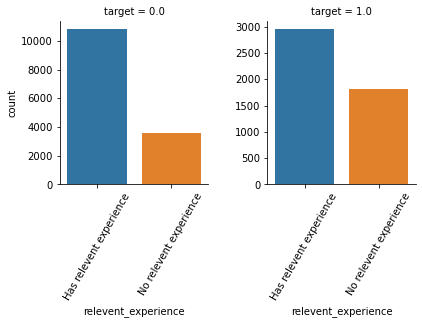

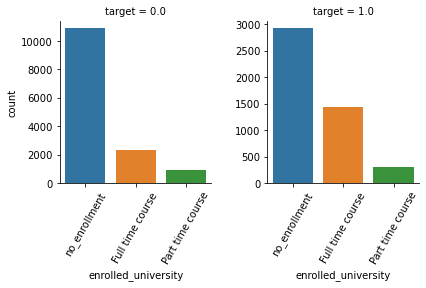

In [13]:
for col in data.select_dtypes(include='object'):
    if data[col].nunique() <= 4:
        g = sns.catplot(x=col, kind='count', col='target', data=data, sharey=False, height=3, aspect=1)
        g.set_xticklabels(rotation=60)

We can see that the `gender` classes do not change much depending on the `target`, but there is a significant difference when it comes to `relevant_experience` and `enrolled_university` meaning that these categories are better predictors.

## 11. Group numeric features by categorical features.

observe how the numeric features are distributed by calculating a metric such as mean, median, and standard deviation across the classes

In [14]:
data.groupby('target').mean()

,city_development_index,training_hours,experience_num,last_new_job_num
target,,,,
0.0,0.853139,66.113761,10.789734,2.079649
1.0,0.755719,63.118484,8.020194,1.758598


In [15]:
num_cols = ['training_hours', 'target', 'experience_num', 'last_new_job_num']
for col in data.select_dtypes(include='object'):
    if data[col].nunique() <= 3:
        display(data.groupby(col)[num_cols].mean())

,training_hours,target,experience_num,last_new_job_num
gender,,,,
Female,65.636511,0.263328,9.154406,1.947240
Male,65.297633,0.227819,10.863124,2.096328
Other,63.869110,0.261780,9.079787,1.780105


,training_hours,target,experience_num,last_new_job_num
relevent_experience,,,,
Has relevent experience,65.800174,0.214690,11.537605,2.255435
No relevent experience,64.253261,0.338427,6.402806,1.330623


,training_hours,target,experience_num,last_new_job_num
enrolled_university,,,,
Full time course,64.532340,0.380889,5.763447,1.209134
Part time course,67.571786,0.252087,7.980785,1.836332
no_enrollment,65.362018,0.211406,11.548483,2.242733


## Interactions between numeric features and other numeric features

## 12. Correlation matrix for the various numeric features

In [16]:
data.corr()

,city_development_index,training_hours,target,experience_num,last_new_job_num
city_development_index,1.000000,0.001920,-0.341665,0.333967,0.188984
training_hours,0.001920,1.000000,-0.021577,0.000908,-0.006276
target,-0.341665,-0.021577,1.000000,-0.176724,-0.082607
experience_num,0.333967,0.000908,-0.176724,1.000000,0.479033
last_new_job_num,0.188984,-0.006276,-0.082607,0.479033,1.000000


## 13. Heat map of the correlations
What to look out for:
- Strongly correlated features. These are either dark-red (strong positive) or dark-blue (strong negative).
- Target feature’s strong correlations. If any features have a strong positive or negative correlation with the target.

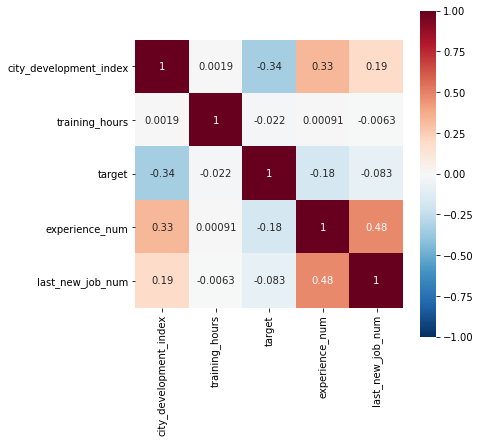

In [17]:
plt.figure(figsize=(6,6))
sns.heatmap(data.corr(), cmap='RdBu_r', annot=True, vmax=1, vmin=-1, square=True)
plt.show()

We see that `experience` and `last_new_job` have a somewhat strong positive correlation. We also see a slightly weak negative relationship between the `target` and `city_development_index`.